## Diagramme de bande

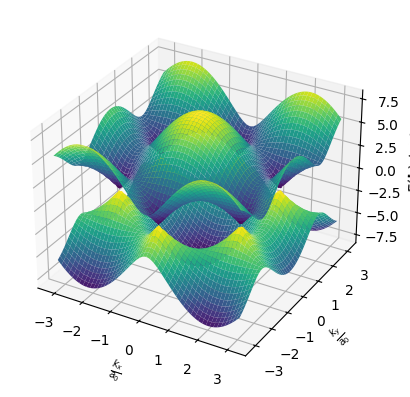

In [38]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.7 # eV

kx = np.linspace(-np.pi,np.pi,1000)
ky = np.linspace(-np.pi,np.pi,1000)
kx, ky = np.meshgrid(kx, ky)

k = np.array([kx, ky])
a1 = a / 2 * np.array([3, np.sqrt(3)])
a2 = a / 2 * np.array([3, -np.sqrt(3)])

dot_k_a1 = np.tensordot(k, a1, axes=(0, 0))  
dot_k_a2 = np.tensordot(k, a2, axes=(0, 0))  
dot_k_a2_a1 = np.tensordot(k, a2 - a1, axes=(0, 0))

E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))
E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(kx, ky, E_n, cmap='viridis')
ax.plot_surface(kx, ky, E_p, cmap='viridis')
ax.set_xlabel(r'$\frac{k_x}{a_0}$')
ax.set_ylabel(r'$\frac{k_y}{a_0}$')
ax.set_zlabel(r'E($\mathbf{k}$) (eV)')

plt.show()

In [ ]:
import numpy as np
from scipy import integrate


# Constantes
hbar = 6.582119570e-16  # eV/s
time = np.linspace(0, 100e-15, 11)
x_vals = np.linspace(-a, a, 10)
y_vals = np.linspace(-a, a, 10)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

grid = np.array([x_grid, y_grid])

def fonction_onde(ky, kx, x, y, t, t_hop):
    f = 3 + 2 * np.cos(np.sqrt(3) * ky * a) + 4 * np.cos(3/2 * kx * a) * np.cos(np.sqrt(3)/2 * ky * a)
    psi = 1/np.sqrt(2) * np.exp(1j * (kx * x + ky * y) - 1j * t_hop * np.sqrt(f) * t / hbar)
    return psi

psi = np.zeros((10, 10), dtype = np.complex128)
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        result, error = integrate.nquad(fonction_onde, [[-1000000, 1000000],[-1000000, 1000000]], args=(x,y,10e-15,-2.7))
        psi[i][j] = result
print(psi)

hello


c:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:606: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
c:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the 

[[-1.1908206e+10+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.

In [ ]:
## À ignorer pour l'instant

import numpy as np
import scipy.linalg

# Constantes
hbar = 6.582119570e-16  # eV/s
time = np.linspace(0, 100e-15, 11)
pos_ini = a1
c_a = 1
c_b = 1

def operateur_evolution(kx, ky, t):
    E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(kx * (a2 - a1)[0] + ky * (a2 - a1)[1]) + 2 * np.cos(kx * a1[0] + ky * a1[1]) + 2 * np.cos(kx * a2[0] + ky * a2[1]))
    E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(kx * (a2 - a1)[0] + ky * (a2 - a1)[1]) + 2 * np.cos(kx * a1[0] + ky * a1[1]) + 2 * np.cos(kx * a2[0] + ky * a2[1]))
    # (1000, 1000, 2, 2)
    U = np.zeros((kx.shape[0], kx.shape[1], 2, 2), dtype=complex)


    U[:, :, 0, 0] = np.exp(-1j * E_p * t / hbar)  # (1000,1000)
    U[:, :, 1, 1] = np.exp(-1j * E_n * t / hbar)  # (1000,1000)
    return U

def impulsion(c_a, c_b, kx, ky, pos_ini):

    imp_ini = np.zeros((kx.shape[0], kx.shape[1], 2, 1), dtype=complex)

    imp_ini[:, :, 0, 0] = c_a * np.exp(-1j * (kx * pos_ini[0] + ky * pos_ini[1]))
    imp_ini[:, :, 1, 0] = c_b * np.exp(-1j * (kx * pos_ini[0] + ky * pos_ini[1]))
    return imp_ini

psi_t = []

#print(operateur_evolution(kx,ky,time[1]))
#print(impulsion(c_a, c_b, kx, ky, pos_ini))
for t in time:
    psi = np.einsum('...ij,...jk->...ik', operateur_evolution(kx, ky, t), impulsion(c_a, c_b, kx, ky, pos_ini))
    psi_a = psi[:,:,0,0]
    psi_b = psi[:,:,1,0]
    psi2_a = np.abs(psi_a) ** 2
    psi2_b = np.abs(psi_b) ** 2
    if t==10e-15:
        # print(psi)
        print(psi2_a)
        
    


[[0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 ...
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]]


KeyboardInterrupt: 